# <center>Centro Universitário Facens<br/></center>
<font size="4"><center><b>Disciplina: Reconhecimento de Padrões</b></center></font>
  
<font size="3"><center>Prof. Fabrício Torquato</center></font>

# <center>Avaliação Continuada 2 (AC2)</center>
## <center>Dataset escolhido: Most Streamed Spotify Songs 2023</center>


----
#### <center>RA, Turma e nome dos componentes do grupo</center>

    
| RA       | Turma        |           Nome            |
|:-        |:-            |:-------------------------:|
|  XXXXXX  |  CP803TIN2   | João Pedro Santos Batista |
|  XXXXXX  |  CP803TIN2   | Vinicius Ribeiro Silva    |
    

*   Link para download do dataset (GitHub): https://github.com/jpsbat/datasets_ac2
* Link do Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/code?datasetId=3668746&outputs=Visualization

In [ ]:
# Import das bibliotecas
import pandas as pd
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeRegressor
import re as re

import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow import keras

tf.random.set_seed(1)

pd.set_option('display.max_columns', None)
%matplotlib inline

import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

TensorFlow version: 2.17.0


#### <center>Escolha do dataset</center>
Dataset Most Streamed Spotify Songs 2023 (regressão): Classe alvo streams, o problema seria prever o número de streams de uma música

---

# Análise exploratória de dados

In [ ]:
spotify = pd.read_csv('spotify-2023.csv', encoding = 'latin-1')

# spotify = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv')

In [ ]:
print(spotify.shape)

(953, 24)


In [ ]:
print(spotify.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


# Dicionário das colunas

* **acousticness_%**: Percentual de "acústica" da faixa
* **artist_count**: Número de artistas que participam
* **artist(s)_name**: Nome(s) do(s) artista(s) que interpretam
* **bpm**: Batidas por minuto da faixa
* **danceability_%**: Percentual de "dançabilidade" da faixa
* **energy_%**: Percentual de energia da faixa (intensidade e velocidade)
* **in_apple_charts**: Se a faixa está nas paradas da Apple Music (Sim/Não)
* **in_apple_playlists**: Se a faixa está presente em playlists da Apple Music (Sim/Não)
* **in_deezer_charts**: Se a faixa está nas paradas do Deezer (Sim/Não)
* **in_deezer_playlists**: Se a faixa está presente em playlists do Deezer (Sim/Não)
* **in_shazam_charts**: Se a faixa está nas paradas do Shazam (Sim/Não)
* **in_spotify_charts**: Se a faixa está nas paradas do Spotify (Sim/Não)
* **in_spotify_playlists**: Se a faixa está presente em playlists do Spotify (Sim/Não)
* **instrumentalness_%**: Percentual de instrumentalidade da faixa, indicando se há pouca ou nenhuma presença
* **key**: Tom (musical) da faixa
* **liveness_%**: Percentual de presença ao vivo, indicando a probabilidade de que a faixa tenha sido gravada ao vivo
* **mode**: Modo (musical) da faixa (maior (1) ou menor (0))
* **released_day**: Dia de lançamento
* **released_month**: Mês de lançamento
* **released_year**: Ano de lançamento
* **speechiness_%**: Percentual de fala na faixa, indicando a quantidade de palavras faladas em relação à música
* **streams**: Número total de reproduções da faixa no Spotify
* **track_name**: Nome da faixa
* **valence_%**: Percentual de positividade da faixa (alto para sentimento positivo, baixo para sentimento negativo)

In [ ]:
spotify.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147,48,113,100,50
streams,141381703,133716286,140003974,800840817,303236322
in_apple_playlists,43,48,94,116,84


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.6,0.9,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.2,11.1,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.0,3.6,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.9,9.2,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.1,7897.6,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.0,19.6,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.8,86.4,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.9,50.6,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.7,6.0,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.5,28.1,65.0,100.0,121.0,140.0,206.0


In [ ]:
# Verificando se existem dados nulos
spotify.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [ ]:
# Verificando se existem dados duplicados
sum(spotify.duplicated())

0

In [ ]:
# Verificando dados únicos
spotify.nunique()

,0
track_name,943
artist(s)_name,645
artist_count,8
released_year,50
released_month,12
released_day,31
in_spotify_playlists,879
in_spotify_charts,82
streams,949
in_apple_playlists,234


In [ ]:
numero_de_artistas = spotify['artist(s)_name'].value_counts()
numero_de_artistas

,count
artist(s)_name,
Taylor Swift,34
The Weeknd,22
Bad Bunny,19
SZA,19
Harry Styles,17
...,...
"Karol G, Ovy On The Drums",1
"Coolio, L.V.",1
Kordhell,1


In [ ]:
numero_de_artistas = spotify['artist(s)_name'].value_counts().reset_index()
numero_de_artistas.columns = ['artist_name', 'song_count']

colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C","#512E5F","#45B39D","#AAB7B8","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

fig = px.bar(numero_de_artistas[:15],
             x='artist_name',
             y='song_count',
             text='song_count',
             color='artist_name',
             color_discrete_sequence=colors,
             labels={'artist_name': 'Artista', 'song_count': 'Contagem de Músicas'},
             title='Top 15 Artistas com Mais Músicas')

fig.update_layout(xaxis_title="Artistas", yaxis_title="Contagem de Músicas")
fig.update_traces(textposition='outside')
fig.show()

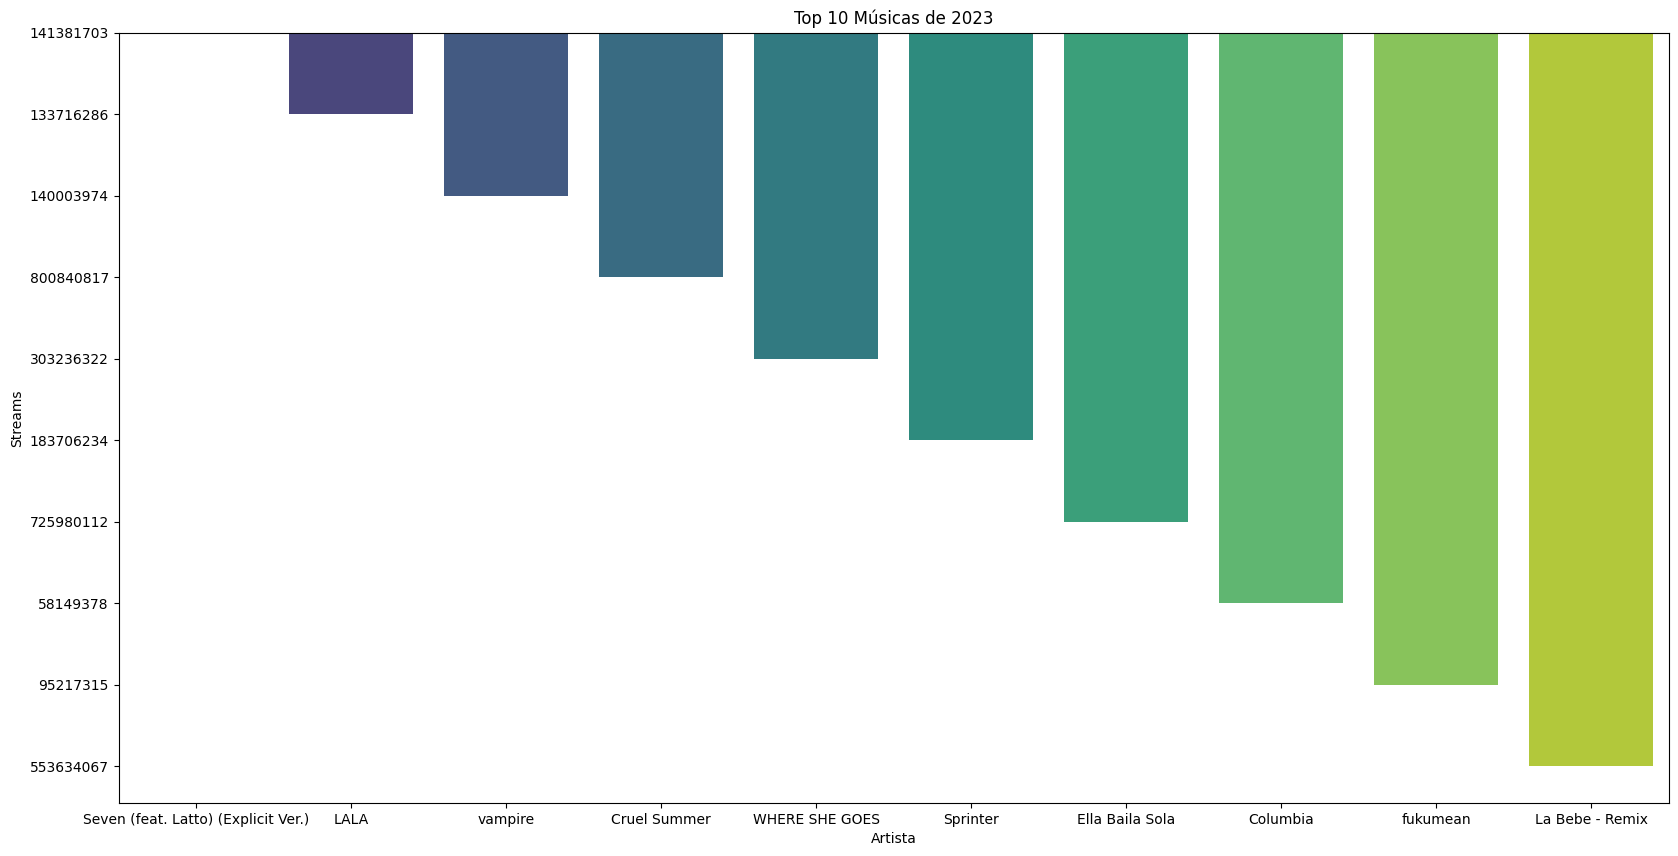

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = spotify.track_name[:10], y = spotify.streams, palette='viridis', orient='v')
plt.title('Top 10 Músicas de 2023')
plt.xlabel('Artista')
plt.ylabel('Streams')
plt.show()

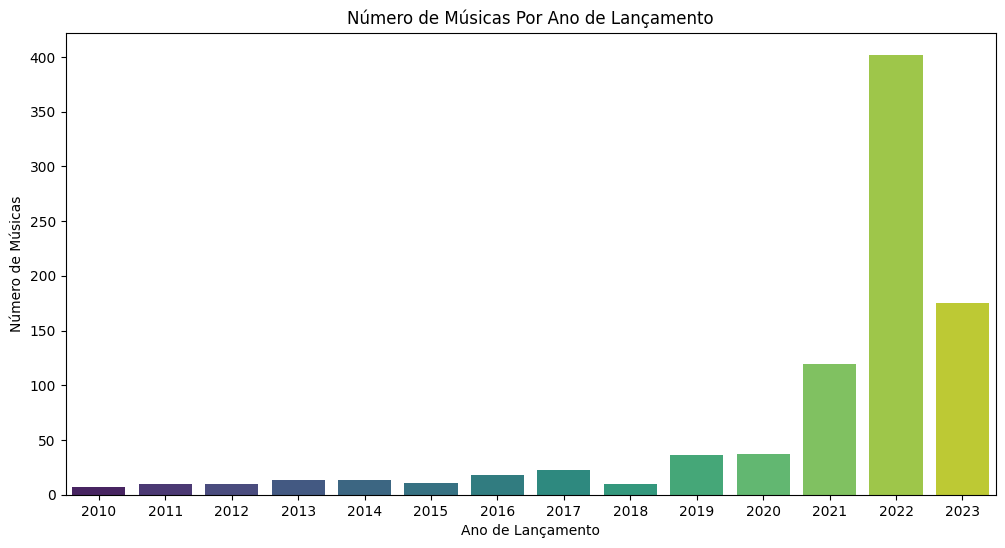

In [ ]:
musicas_por_ano = spotify['released_year'].value_counts().reset_index()
musicas_por_ano.columns = ['released_year', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=musicas_por_ano.head(14), palette='viridis')
plt.title('Número de Músicas Por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Músicas')
plt.show()

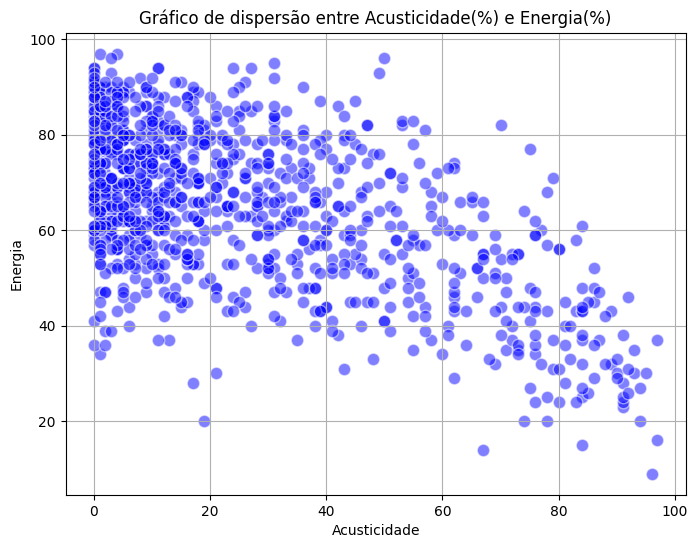

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(spotify['acousticness_%'], spotify['energy_%'], color='blue' , alpha=0.5, edgecolors='w', s=80)
plt.title('Gráfico de dispersão entre Acusticidade(%) e Energia(%)')
plt.xlabel('Acusticidade')
plt.ylabel('Energia')
plt.grid(True)
plt.show()

In [ ]:
px.scatter(spotify, x='acousticness_%', y='energy_%',color='mode',template='plotly_white',
           title='Acusticidade vs. Energia por Modo')

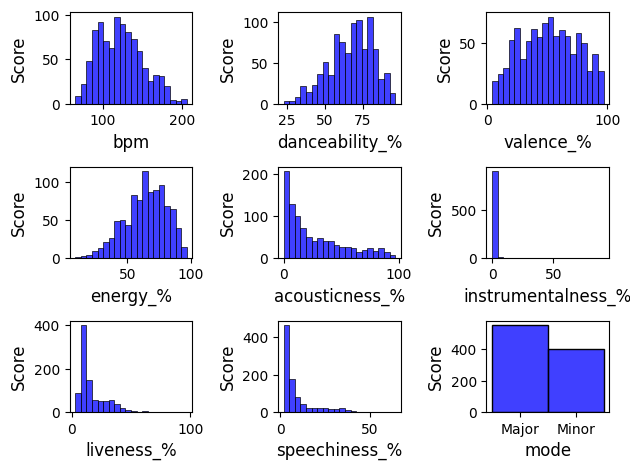

In [ ]:
colunas_do_grafico = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'mode']

for i, column in enumerate(colunas_do_grafico, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=spotify, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

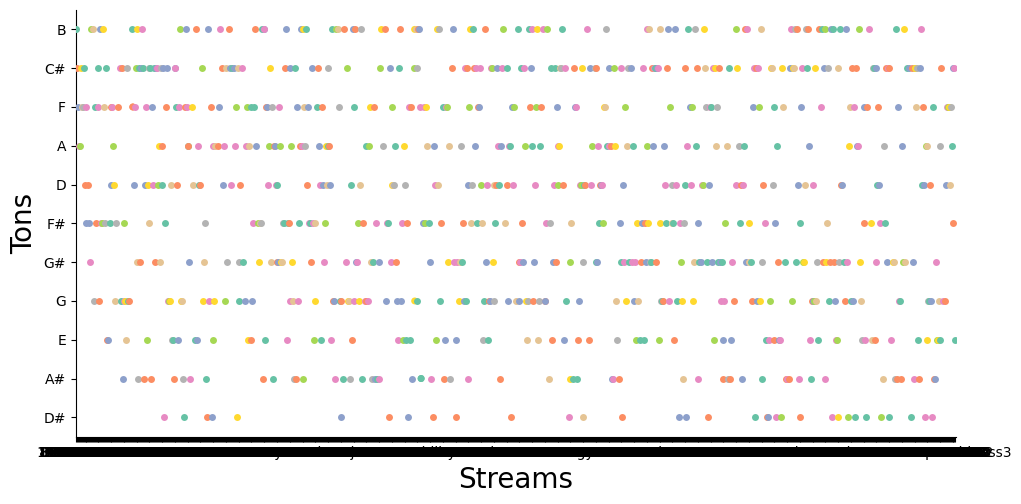

In [ ]:
palette = sns.color_palette("Set2", len(spotify['key'].unique()))

sns.catplot(y="key", x="streams", data=spotify, aspect=2, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Tons", fontsize=20)
plt.show()

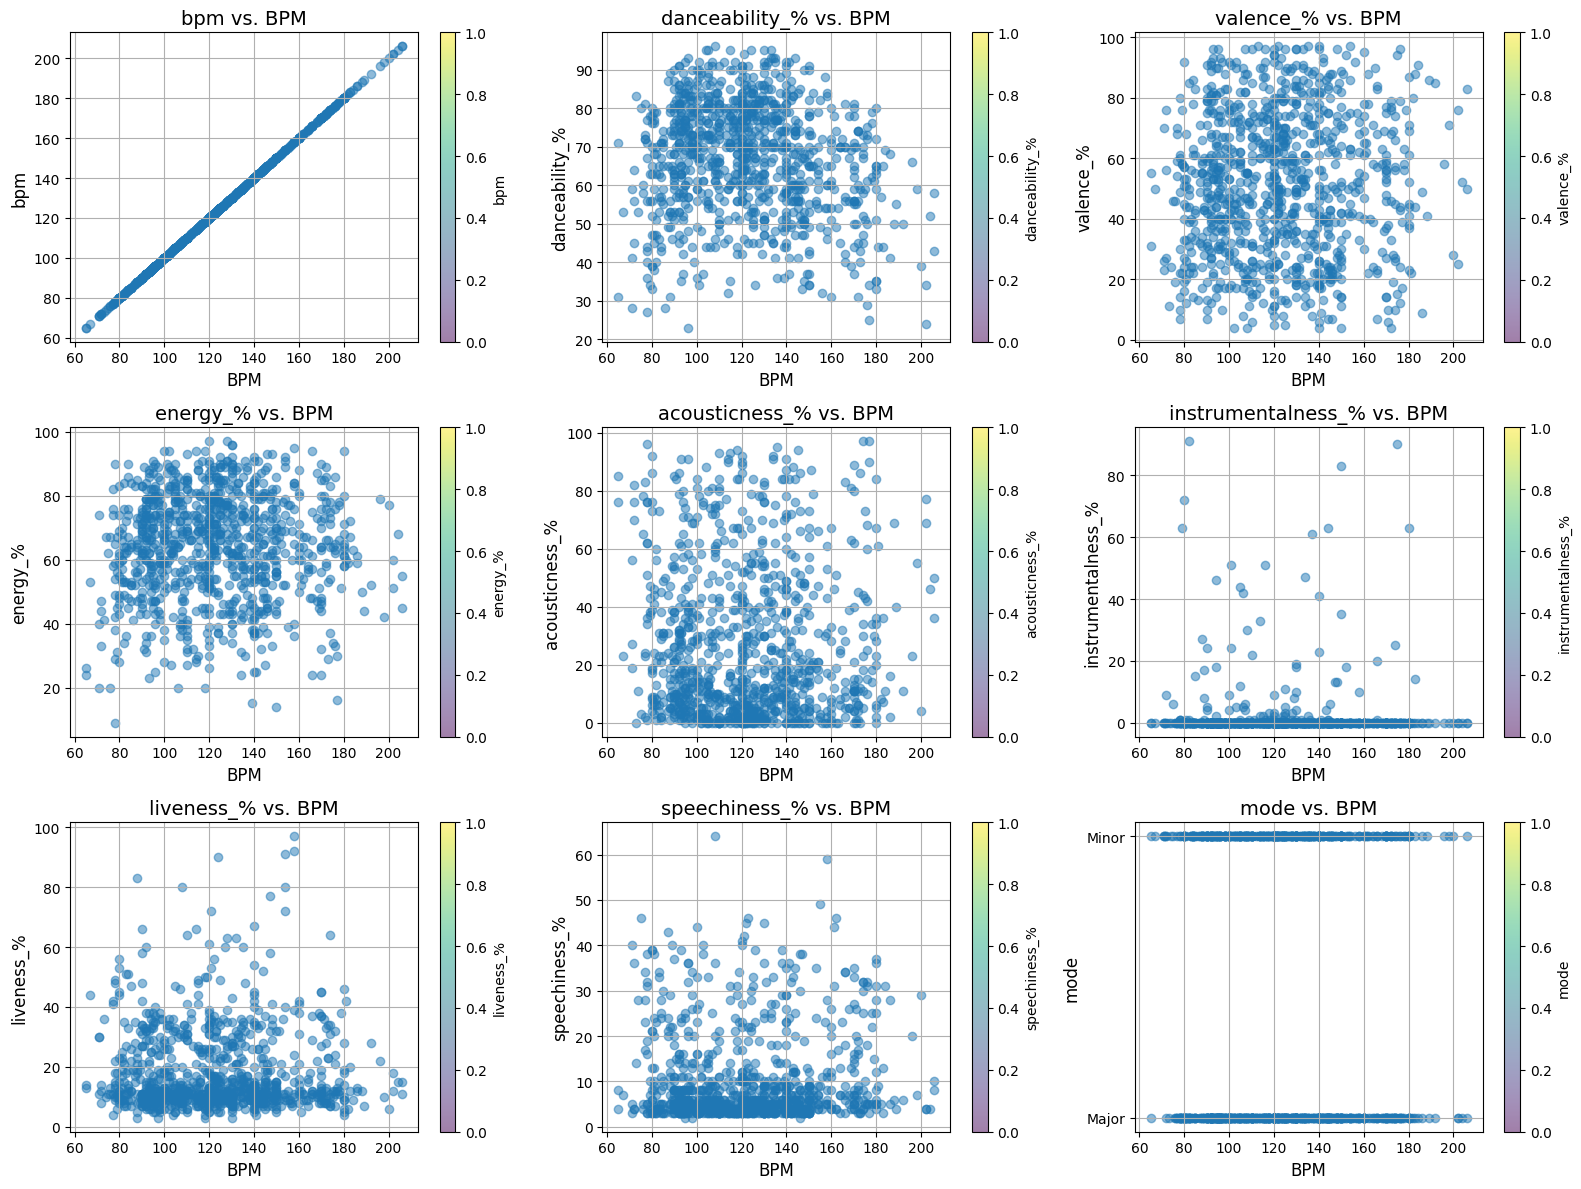

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(colunas_do_grafico):
    plt.sca(axes[i])

    scatter = plt.scatter(spotify['bpm'], spotify[column], cmap=colormap, alpha=0.5)

    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. BPM', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(colunas_do_grafico), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

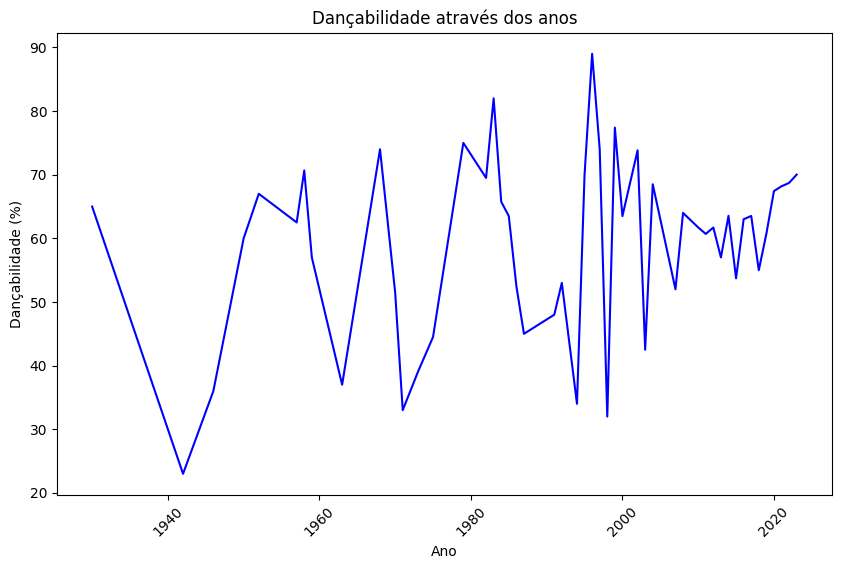

In [ ]:
# Calcula a dançabilidade de cada ano
dancabilidade_por_ano = spotify.groupby('released_year')['danceability_%'].mean()

# Dançabilidade através dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(x=dancabilidade_por_ano.index, y=dancabilidade_por_ano.values, color='blue')
plt.xlabel('Ano')
plt.ylabel('Dançabilidade (%)')
plt.title('Dançabilidade através dos anos')
plt.xticks(rotation=45)
plt.show()

In [ ]:
mode_df = spotify['mode'].value_counts().reset_index()
mode_df.columns = ['mode', 'count']
px.pie(mode_df, values='count', names='mode',
       title='Distribuição de Músicas Por Modo (Maior/Menor)')

In [ ]:
top_songs = px.scatter(spotify, x='danceability_%', y='streams', title='Popularidade vs. Dançabilidade')
top_songs.update_layout(xaxis_title='Dançabilidade (%)', yaxis_title='Streams')
top_songs.show()

In [ ]:
top_songs = spotify.sort_values(by='streams', ascending=False).head(10)
top_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0,110,A,Major,53,75,69,7,0,17,3
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,142,165,9,310,97,E,Major,64,51,63,12,0,19,5
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,47,584,1,NaN,72,A,Minor,45,27,33,82,0,14,4
253,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,109,42,158,3,31,170,G#,Major,44,27,32,89,0,14,5
455,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,5,31,1,0,0,152,C#,Major,65,35,65,44,18,21,7
98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,89,143,"1,632",3,200,112,C#,Minor,56,24,66,7,0,12,3
891,"Come Back Home - From ""Purple Hearts""",Sofia Carson,1,2022,7,12,367,0,97610446,28,67,195,0,0,145,G,Major,56,43,53,24,0,12,4
427,Where Are You Now,"Lost Frequencies, Calum Scott",2,2021,7,30,10565,44,972509632,238,122,557,17,58,121,F#,Minor,67,26,64,52,0,17,10
322,I Love You So,The Walters,1,2014,11,28,7536,7,972164968,44,19,135,0,6,76,A#,Major,58,46,67,65,0,13,4
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,96273746,10,126,7,0,148,130,E,Minor,82,69,83,3,0,27,5


## Na linha 574 da coluna stream há um erro de digitação, o que deve ser levado em consideração no pré-processamento.

# Pré-Processamento

In [ ]:
# Removendo as colunas released_month e released_day, já que released_year já tem dados relevantes sobre a criação da música
colunas_a_remover = ['released_month', 'released_day']
spotify.drop(columns=colunas_a_remover,axis=1,inplace=True)

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   in_spotify_playlists  953 non-null    int64 
 5   in_spotify_charts     953 non-null    int64 
 6   streams               953 non-null    object
 7   in_apple_playlists    953 non-null    int64 
 8   in_apple_charts       953 non-null    int64 
 9   in_deezer_playlists   953 non-null    object
 10  in_deezer_charts      953 non-null    int64 
 11  in_shazam_charts      903 non-null    object
 12  bpm                   953 non-null    int64 
 13  key                   858 non-null    object
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [ ]:
cols = ["track_name", "artist(s)_name", "streams",'in_deezer_playlists','in_shazam_charts', 'key','mode']
spotify[cols] = spotify[cols].astype('category')
pd.DataFrame(spotify.dtypes).T

,track_name,artist(s)_name,artist_count,released_year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,category,category,int64,int64,int64,int64,category,int64,int64,category,int64,category,int64,category,category,int64,int64,int64,int64,int64,int64,int64


# Verificando e lidando com outliers

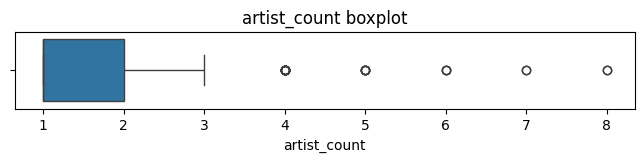

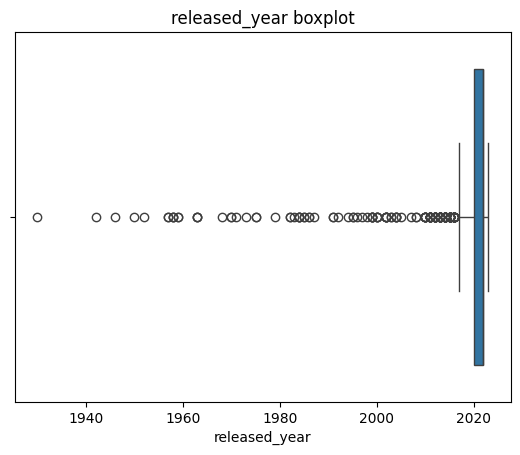

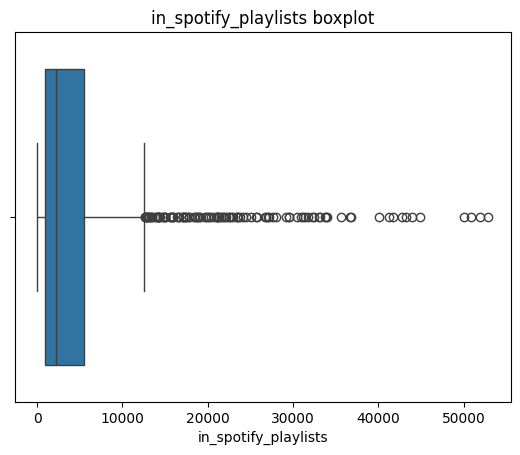

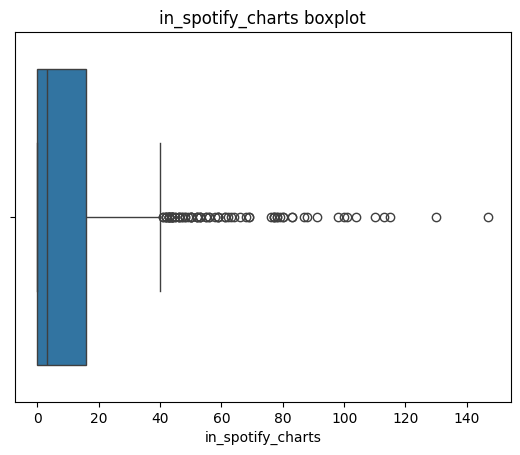

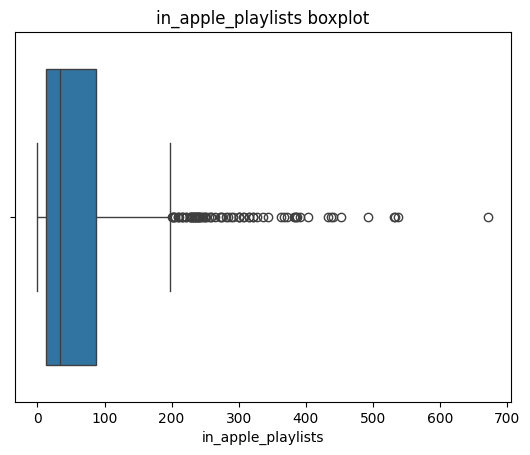

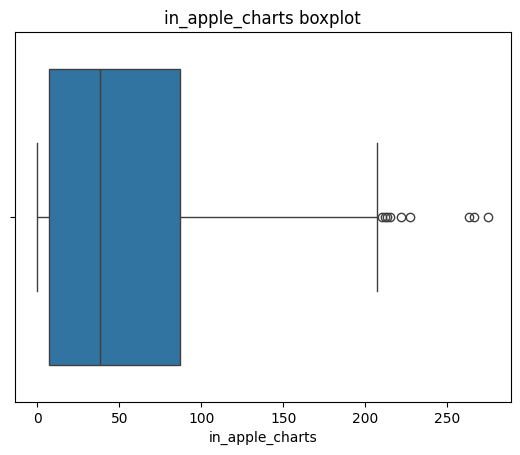

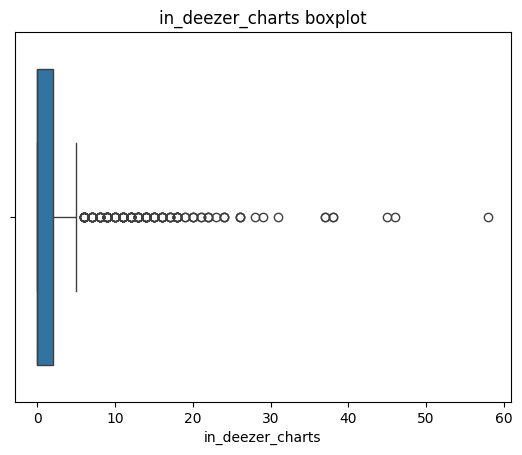

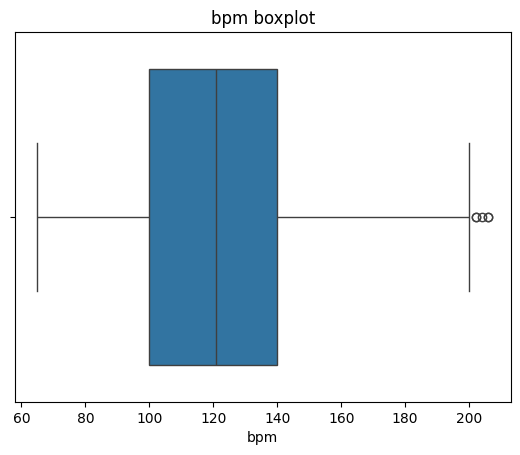

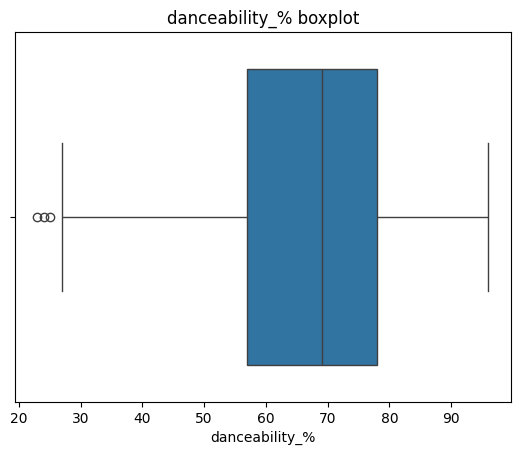

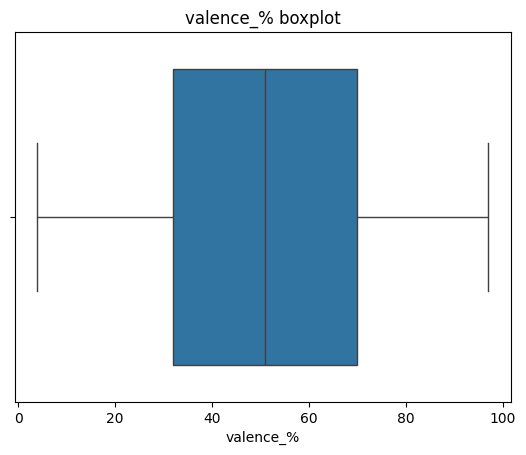

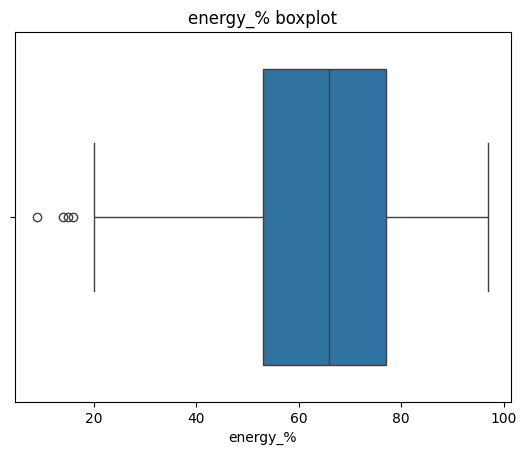

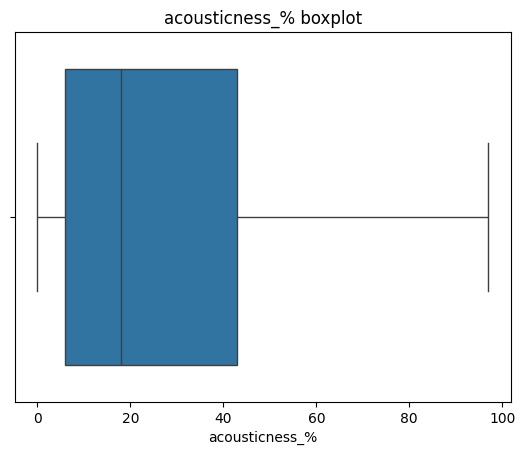

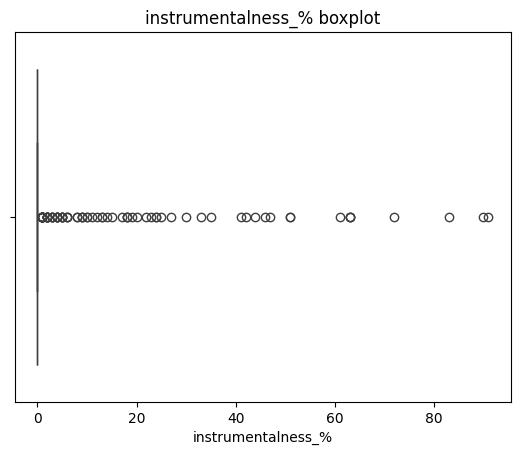

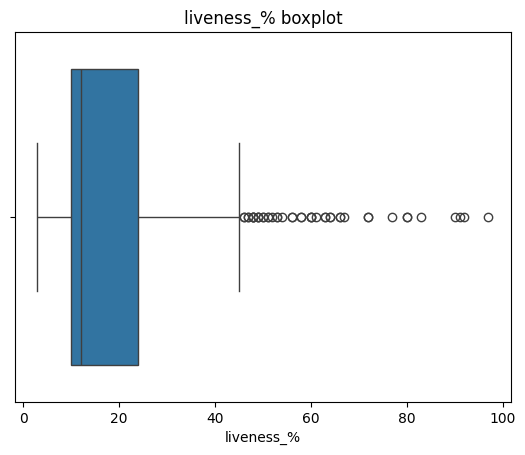

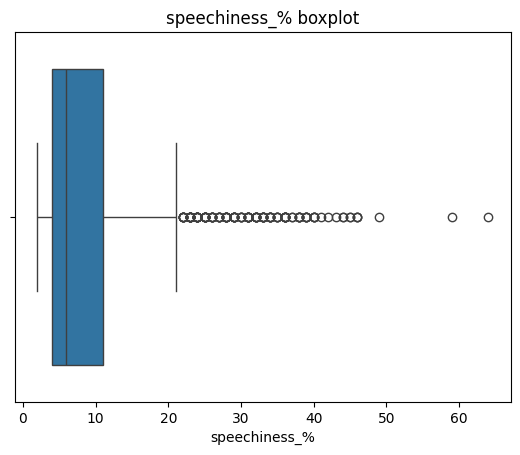

In [ ]:
colunas_numericas = spotify.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8, 1))
for col in colunas_numericas:
    sns.boxplot(spotify[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

In [ ]:
colunas_numericas=['artist_count','released_year','in_spotify_playlists'
          ,'in_spotify_charts','streams','in_apple_playlists'
          ,'in_apple_charts','in_deezer_charts',
          'instrumentalness_%','liveness_%','speechiness_%']

for col in colunas_numericas:
    if pd.api.types.is_numeric_dtype(spotify[col]):
        Q1 = spotify[col].quantile(.25)
        Q3 = spotify[col].quantile(.75)
        IQR = Q3 - Q1
        Lower_Fence = Q1 - 1.5 * IQR
        Upper_Fence = Q3 + 1.5 * IQR
        Lower_Outliers = spotify[spotify[col] < Lower_Fence][col].values
        Upper_Outliers = spotify[spotify[col] > Upper_Fence][col].values
        spotify[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
        spotify[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

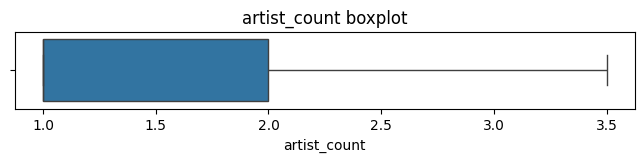

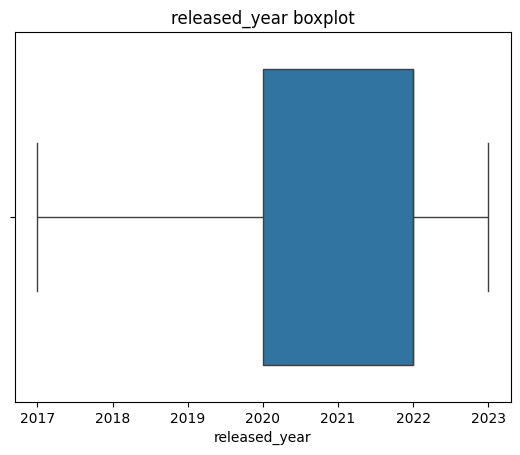

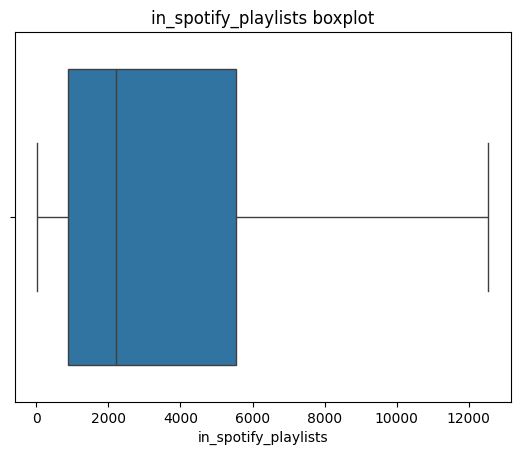

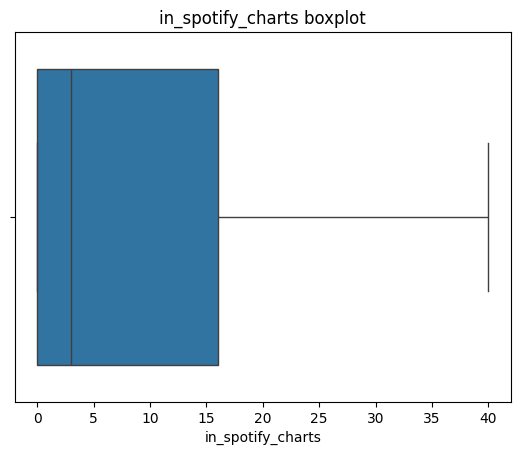

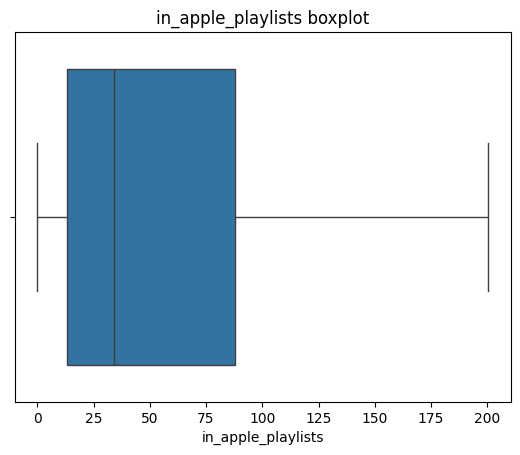

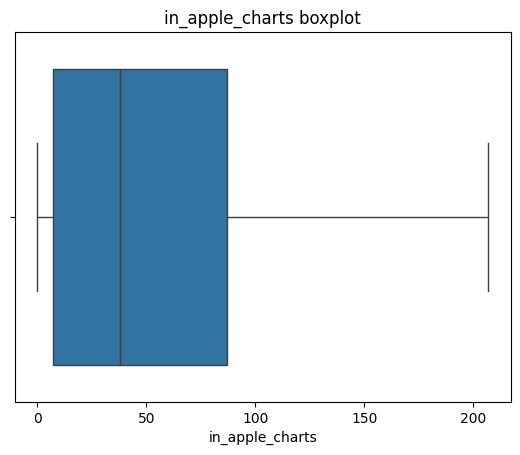

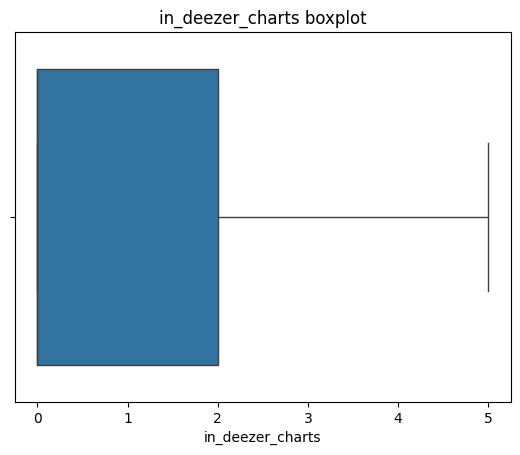

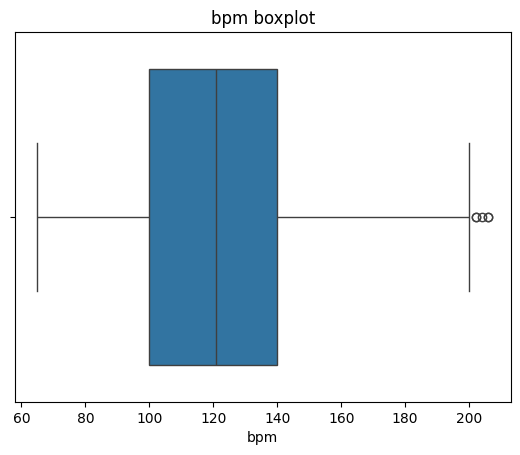

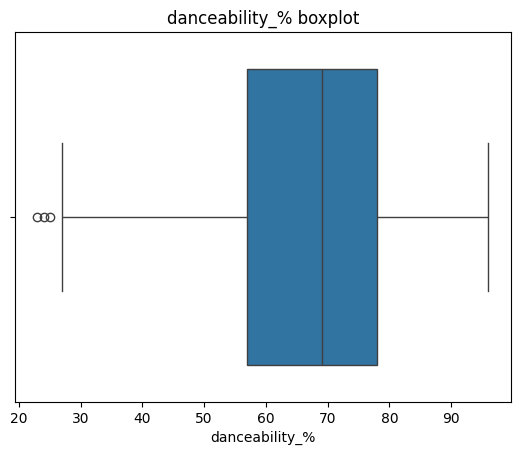

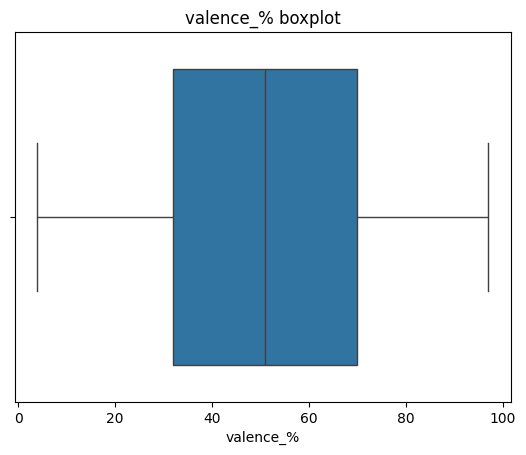

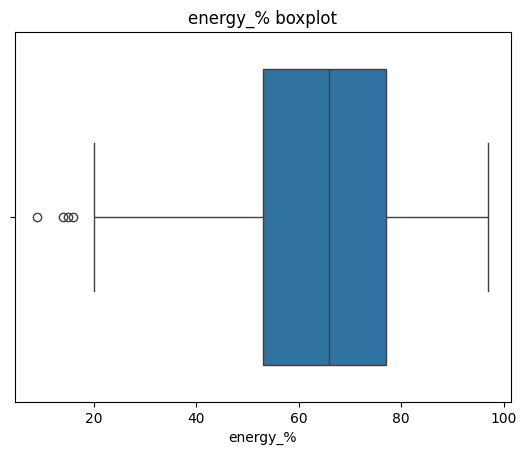

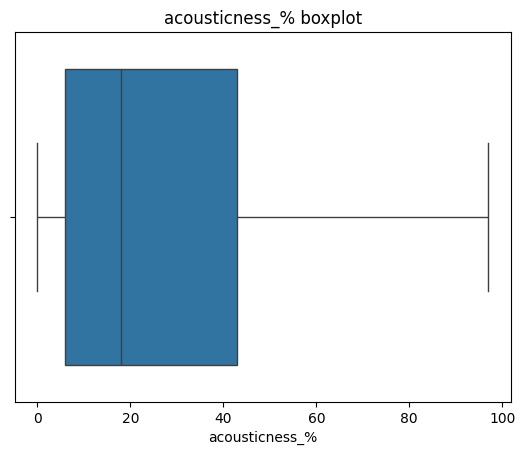

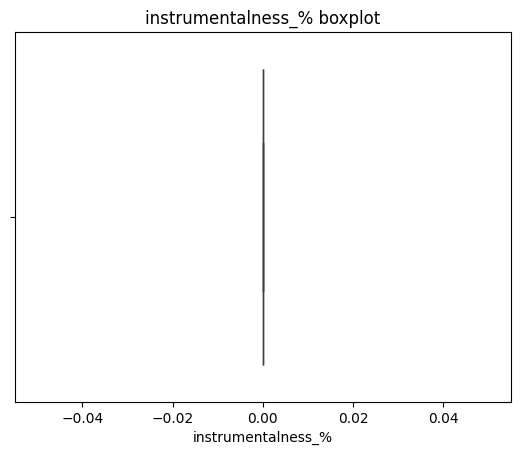

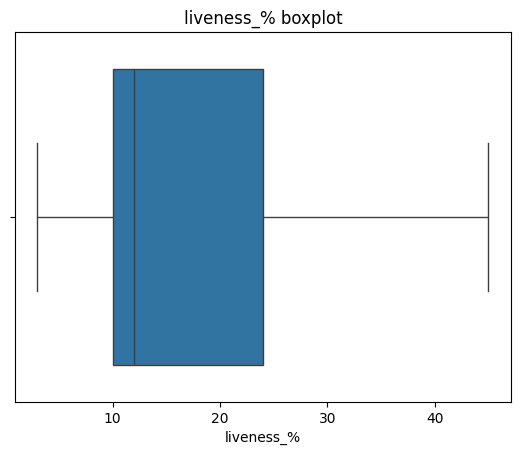

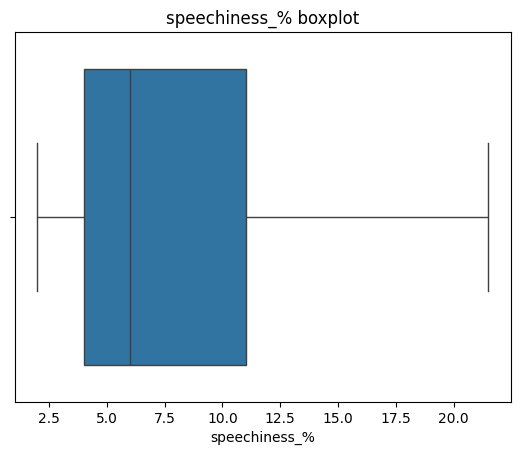

In [ ]:
colunas_numericas = spotify.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8, 1))
for col in colunas_numericas:
    sns.boxplot(spotify[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

In [ ]:
# Conversão de 'streams' para tipo numérico
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

# Cálculo da moda da coluna Streams
mode_of_stream = spotify['streams'].mode()[0]

index_to_change = 574

# Atualização do valor no índice específico pela moda de streams
spotify.loc[index_to_change, 'streams'] = mode_of_stream
print(spotify.iloc[index_to_change])

track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                            1.0
released_year                                          2017
in_spotify_playlists                                 2877.0
in_spotify_charts                                         0
streams                                         156338624.0
in_apple_playlists                                     16.0
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                          0
bpm                                                     110
key                                                       A
mode                                                  Major
danceability_%                                           53
valence_%                               

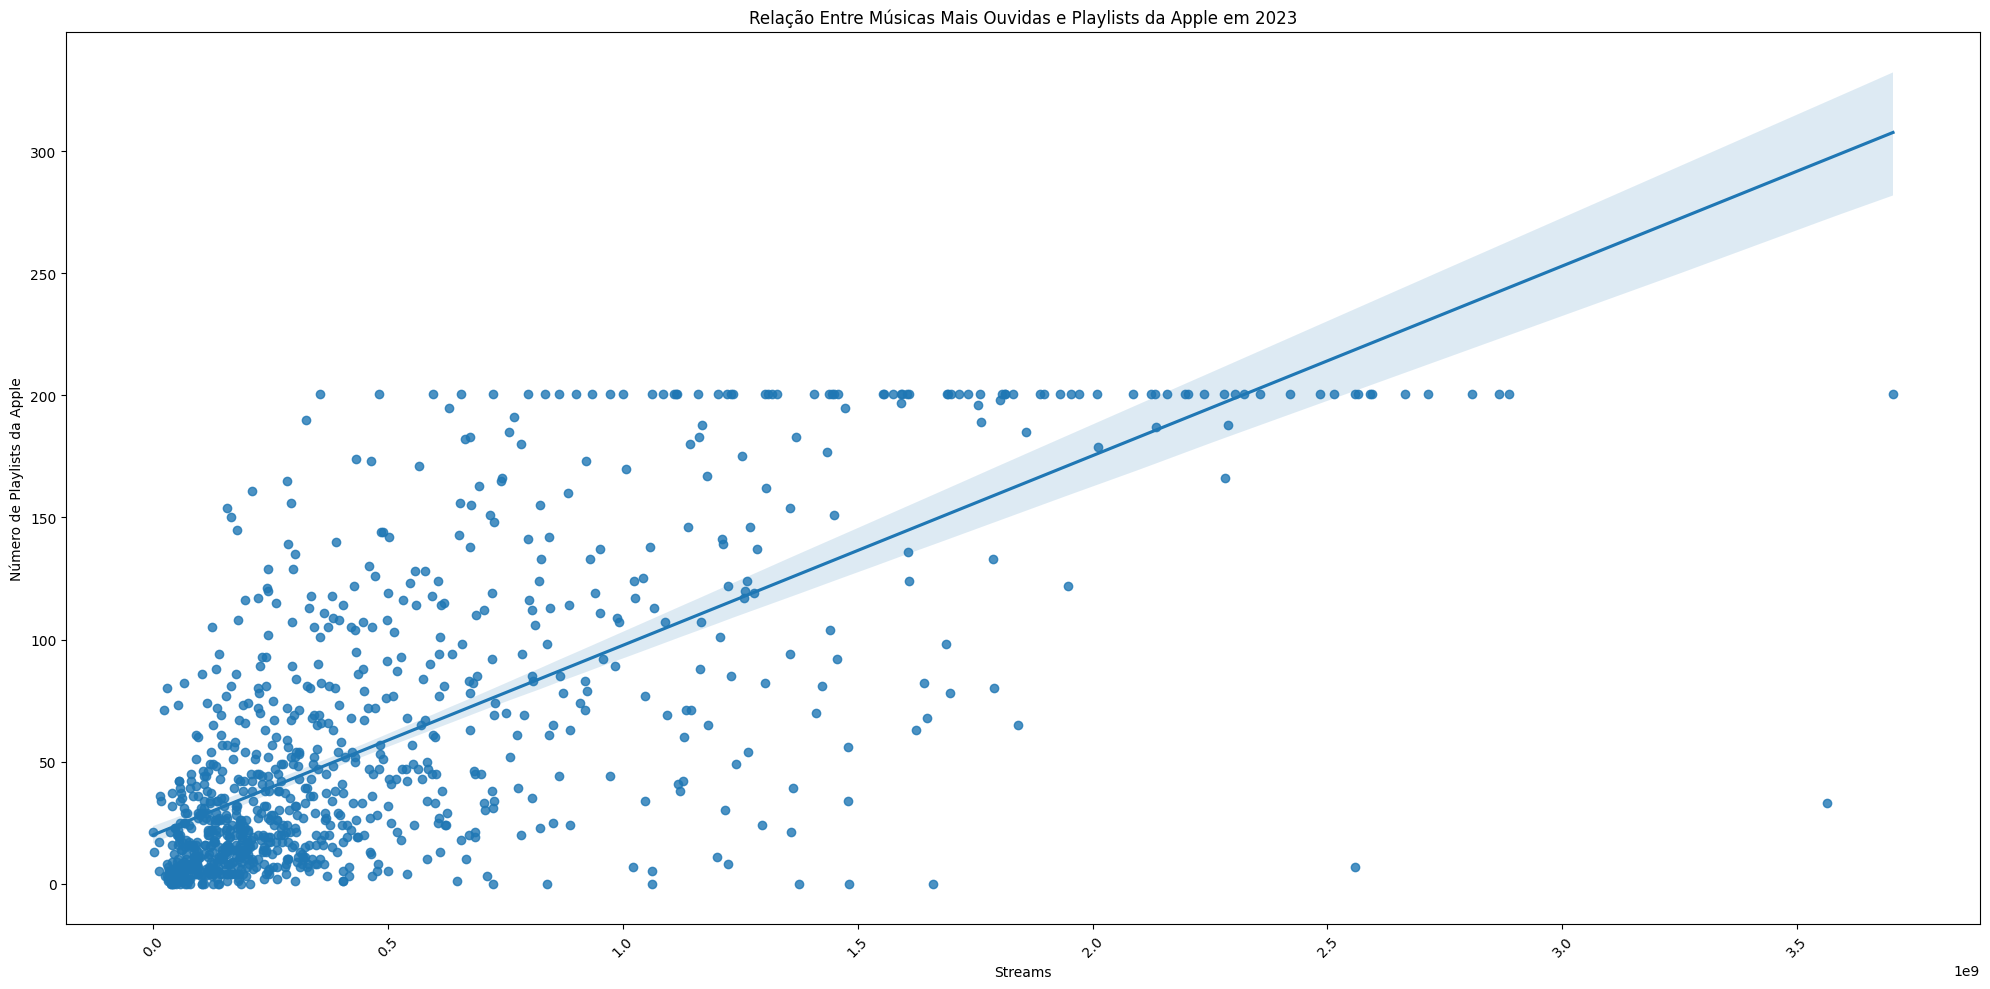

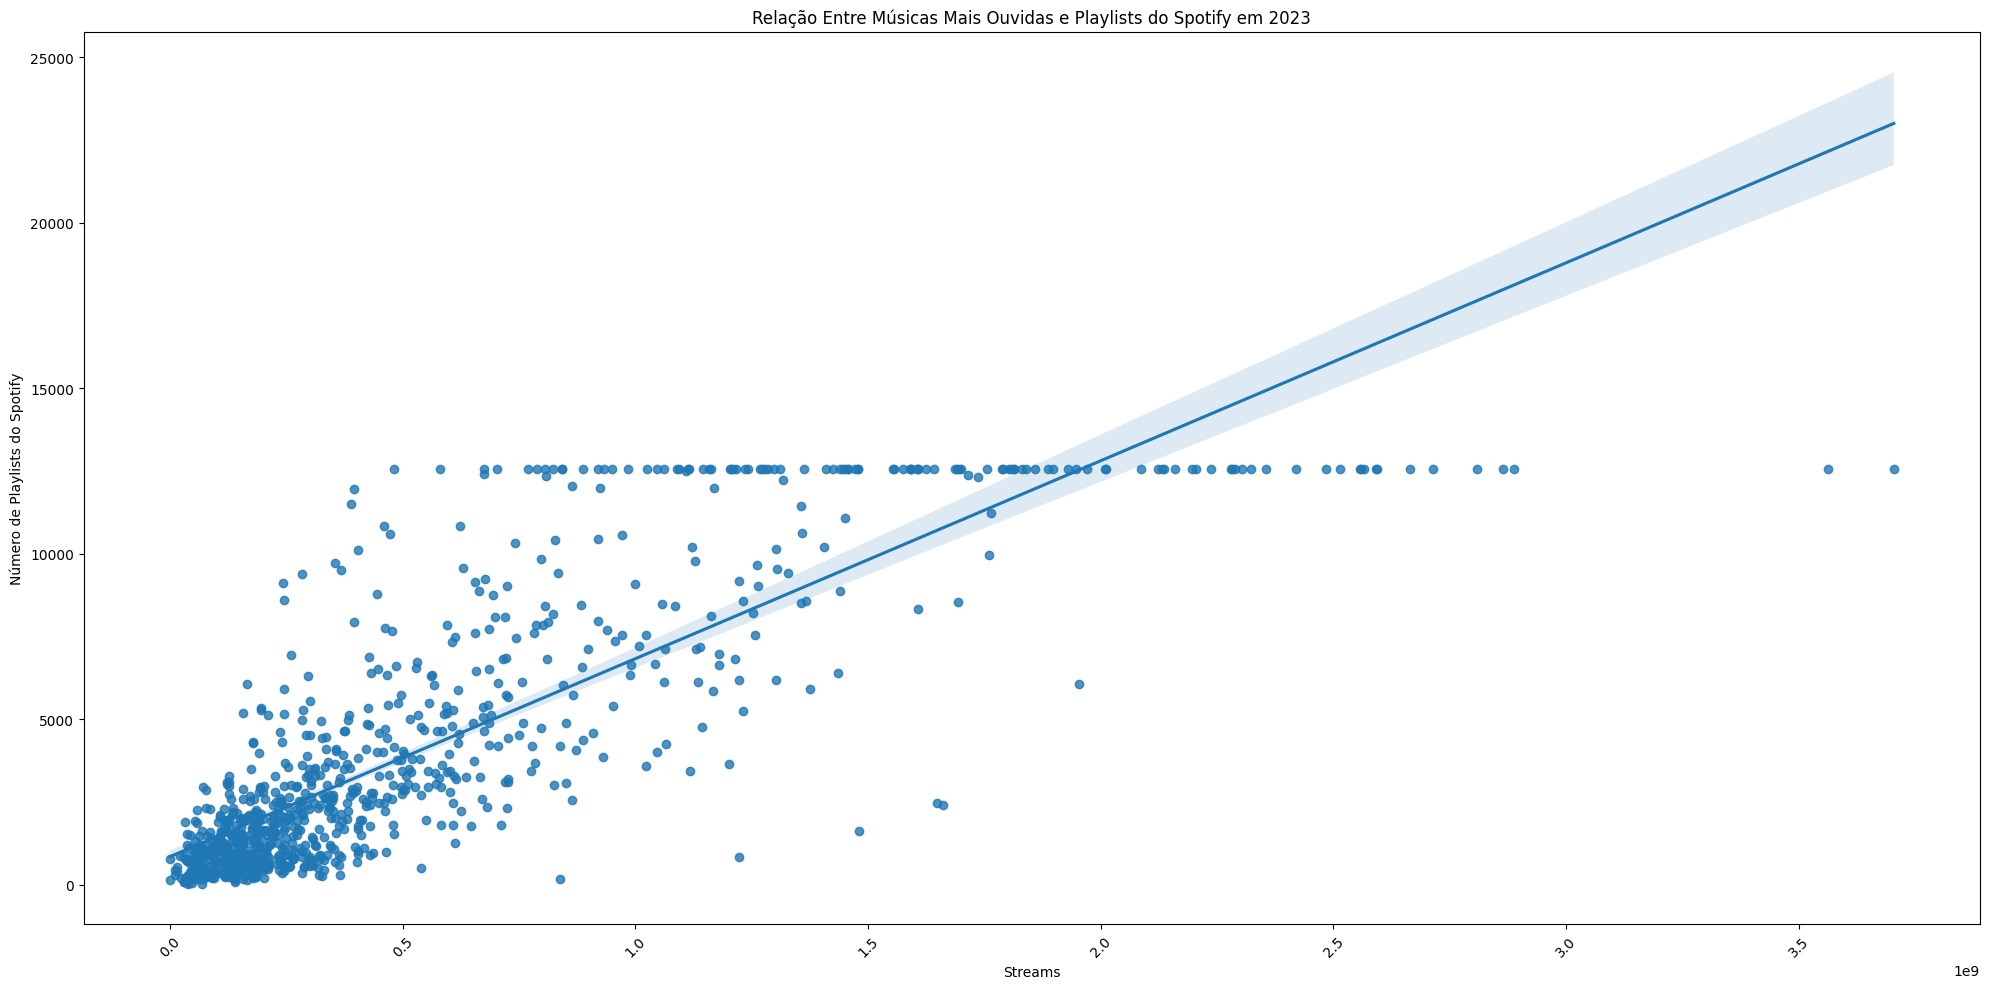

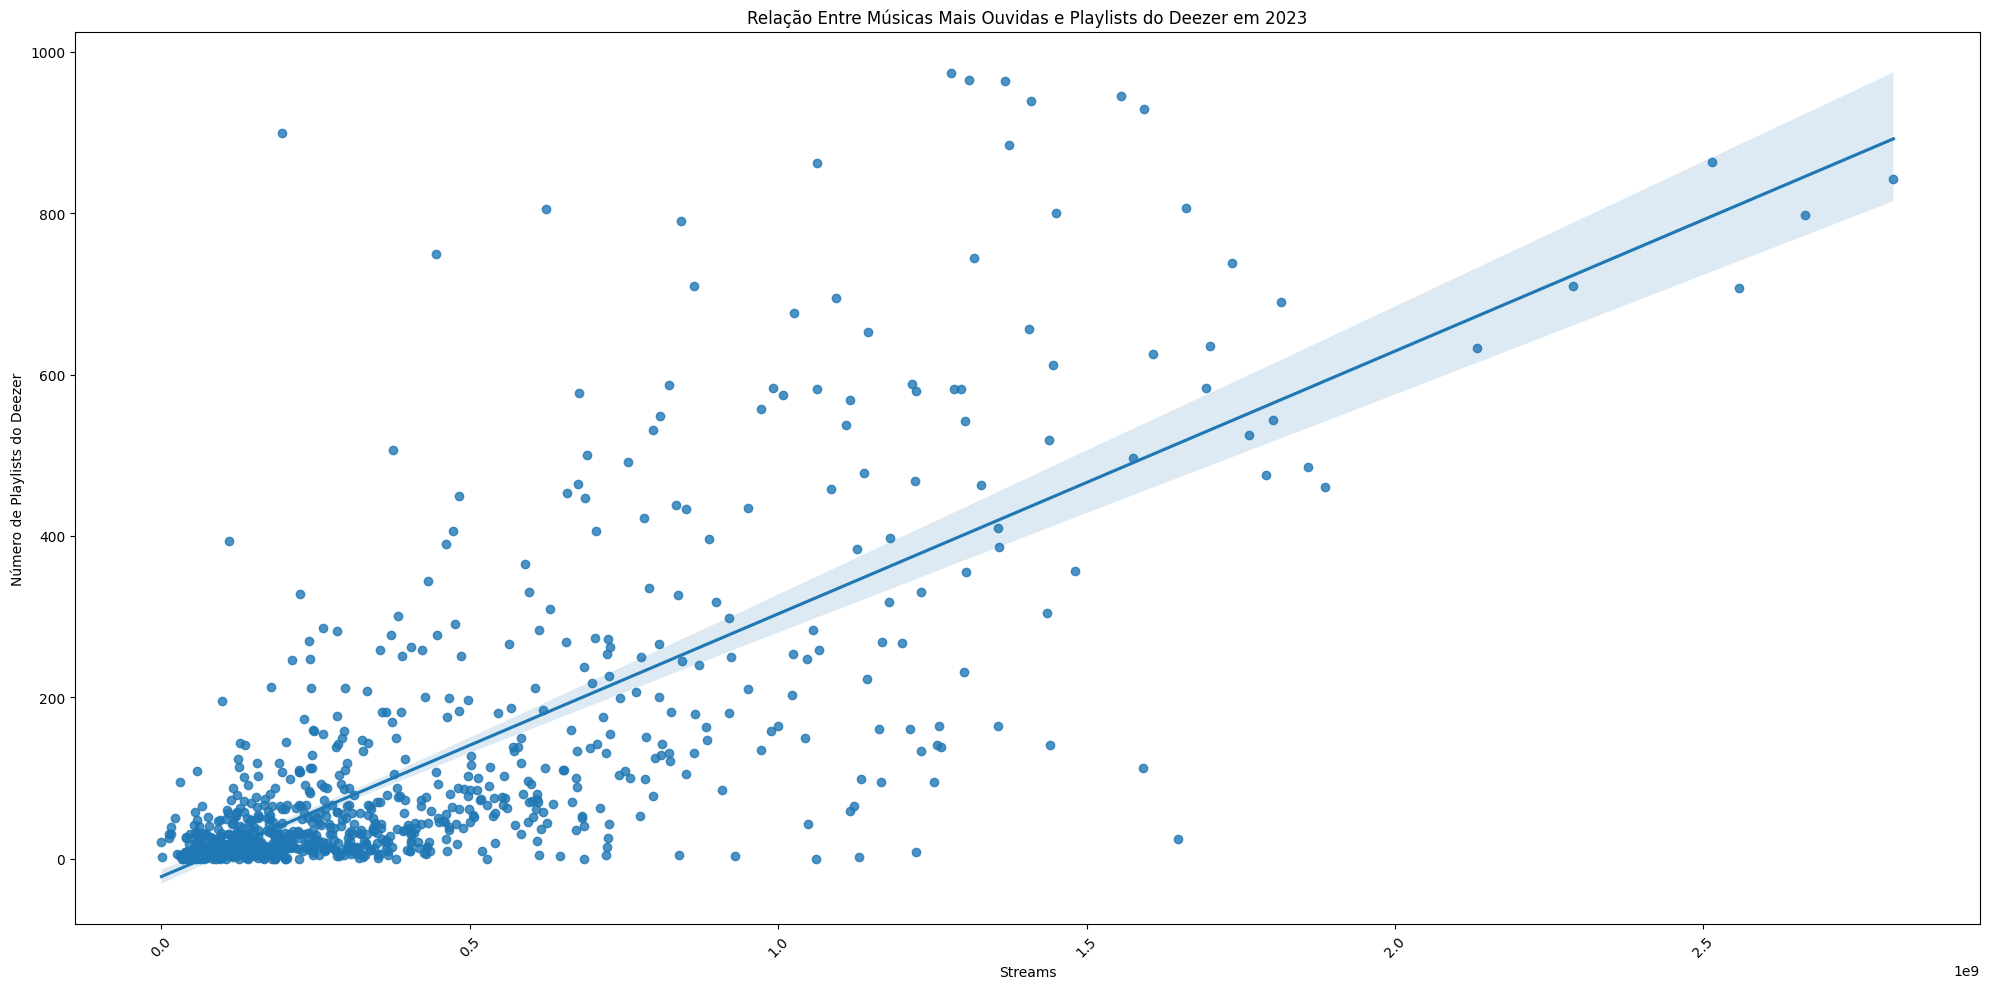

In [ ]:
# Convertendo a coluna in_deezer_playlists para numérico
spotify['in_deezer_playlists'] = pd.to_numeric(spotify['in_deezer_playlists'], errors='coerce')

plt.figure(figsize=(20, 10))

sns.regplot(x='streams', y='in_apple_playlists', data=spotify, scatter=True, fit_reg=True)

plt.title('Relação Entre Músicas Mais Ouvidas e Playlists da Apple em 2023')
plt.xlabel('Streams')
plt.ylabel('Número de Playlists da Apple')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))

sns.regplot(x='streams', y='in_spotify_playlists', data=spotify, scatter=True, fit_reg=True)

plt.title('Relação Entre Músicas Mais Ouvidas e Playlists do Spotify em 2023')
plt.xlabel('Streams')
plt.ylabel('Número de Playlists do Spotify')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))

sns.regplot(x='streams', y='in_deezer_playlists', data=spotify, scatter=True, fit_reg=True)

plt.title('Relação Entre Músicas Mais Ouvidas e Playlists do Deezer em 2023')
plt.xlabel('Streams')
plt.ylabel('Número de Playlists do Deezer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

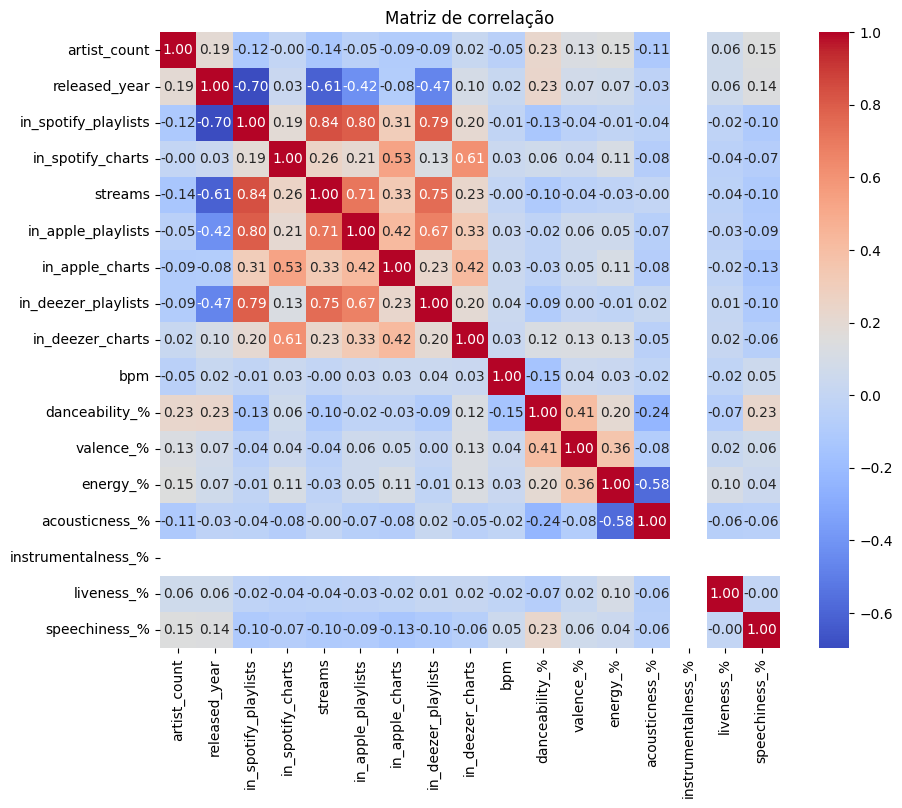

In [ ]:
colunas_numericas = spotify.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação
matriz_de_correlacao = colunas_numericas.corr()

# Plota o gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()

In [ ]:
correlacao = matriz_de_correlacao['streams'].sort_values(ascending=False)
print("Correlação com a classe-alvo:\n", correlacao)

Correlação com a classe-alvo:
 streams                 1.0
in_spotify_playlists    0.8
in_deezer_playlists     0.7
in_apple_playlists      0.7
in_apple_charts         0.3
in_spotify_charts       0.3
in_deezer_charts        0.2
bpm                    -0.0
acousticness_%         -0.0
energy_%               -0.0
liveness_%             -0.0
valence_%              -0.0
speechiness_%          -0.1
danceability_%         -0.1
artist_count           -0.1
released_year          -0.6
instrumentalness_%      NaN
Name: streams, dtype: float64


## Após Análise de Correlação:
Remover as colunas com menos relação:
* bpm
* acousticness_%
* energy_%
* liveness_%
* valence_%
* speechiness_%
* danceability_%
* artist_count
* released_year
* instrumentalness_%
* key
* mode

In [ ]:
colunas_a_remover = ['bpm', 'acousticness_%', 'energy_%', 'liveness_%',
                     'valence_%', 'speechiness_%', 'danceability_%',
                     'artist_count', 'released_year', 'instrumentalness_%',
                     'key', 'mode', 'track_name', 'artist(s)_name']

spotify = spotify.drop(columns = colunas_a_remover)

In [ ]:
# Convertendo a coluna in_shazam_charts para numérico
spotify['in_shazam_charts'] = pd.to_numeric(spotify['in_shazam_charts'], errors='coerce')

In [ ]:
spotify.dtypes

,0
in_spotify_playlists,float64
in_spotify_charts,int64
streams,float64
in_apple_playlists,float64
in_apple_charts,int64
in_deezer_playlists,float64
in_deezer_charts,int64
in_shazam_charts,float64


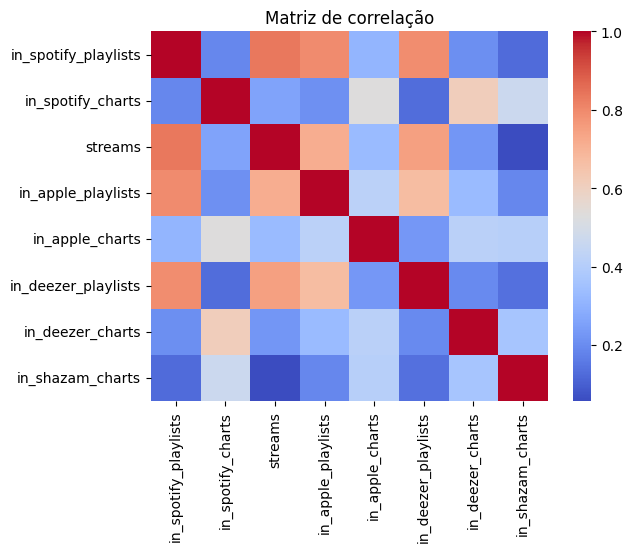

In [ ]:
colunas_numericas = ['in_spotify_playlists', 'in_spotify_charts', 'streams',
                   'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                     'in_deezer_charts', 'in_shazam_charts']

# Calcula a matriz de correlação
matriz_de_correlacao = spotify[colunas_numericas].corr()

# Plota o gráfico
sns.heatmap(matriz_de_correlacao, annot=False, cmap='coolwarm')
plt.title("Matriz de correlação")
plt.show()

In [ ]:
spotify.dtypes

,0
in_spotify_playlists,float64
in_spotify_charts,int64
streams,float64
in_apple_playlists,float64
in_apple_charts,int64
in_deezer_playlists,float64
in_deezer_charts,int64
in_shazam_charts,float64


In [ ]:
y=spotify[['streams']]
x=spotify.drop('streams',axis=1)

In [ ]:
x

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,553.0,40,43.0,207,45.0,5,826.0
1,1474.0,40,48.0,126,58.0,5,382.0
2,1397.0,40,94.0,207,91.0,5,949.0
3,7858.0,40,116.0,207,125.0,5,548.0
4,3133.0,40,84.0,133,87.0,5,425.0
...,...,...,...,...,...,...,...
948,953.0,0,61.0,13,37.0,1,0.0
949,1180.0,0,4.0,0,8.0,0,0.0
950,573.0,0,2.0,0,7.0,0,0.0
951,1320.0,0,29.0,26,17.0,0,0.0


In [ ]:
y

,streams
0,141381703.0
1,133716286.0
2,140003974.0
3,800840817.0
4,303236322.0
...,...
948,91473363.0
949,121871870.0
950,73513683.0
951,133895612.0


In [ ]:
x.isnull().sum()

,0
in_spotify_playlists,0
in_spotify_charts,0
in_apple_playlists,0
in_apple_charts,0
in_deezer_playlists,79
in_deezer_charts,0
in_shazam_charts,57


In [ ]:
x['in_deezer_playlists'].fillna(x['in_deezer_playlists'].mean(), inplace=True)
x['in_shazam_charts'].fillna(x['in_shazam_charts'].mean(), inplace=True)

In [ ]:
x.isnull().sum()

,0
in_spotify_playlists,0
in_spotify_charts,0
in_apple_playlists,0
in_apple_charts,0
in_deezer_playlists,0
in_deezer_charts,0
in_shazam_charts,0


# Treinando o modelo

In [ ]:
# Normalizando a coluna streams
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spotify['streams'] = scaler.fit_transform(spotify[['streams']])

print(spotify['streams'].head())

0   -0.7
1   -0.7
2   -0.7
3    0.5
4   -0.4
Name: streams, dtype: float64


# Regressão Linear

In [ ]:
# Função de plot
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
features = spotify.columns[[i for i in range(len(spotify.columns)) if i != 2]]
label = 'streams'

X = spotify[features].values
y = spotify[[label]].values

# Preenchendo valores NaN em X e y
X = spotify[features].fillna(0).values
y = spotify[[label]].fillna(0).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(667, 7)
(286, 7)
(667, 1)
(286, 1)


In [ ]:
# Escolha um modelo e treine-o
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

linear_regression = keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])

linear_regression.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

Epoch 1/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0858 - val_loss: 0.3671
Epoch 2/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3872 - val_loss: 0.3347
Epoch 3/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3615 - val_loss: 0.3614
Epoch 4/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3862 - val_loss: 0.3280
Epoch 5/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3651 - val_loss: 0.3407
Epoch 6/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3625 - val_loss: 0.3623
Epoch 7/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3743 - val_loss: 0.3241
Epoch 8/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3685 - val_loss: 0.3453
Epoch 9/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3790 - val_loss: 0.3201
Epoch 10/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3662 - val_loss: 0.3377
Epoch 11/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3813 - val_loss: 0.3336
Epoch 12/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3736 - val_l

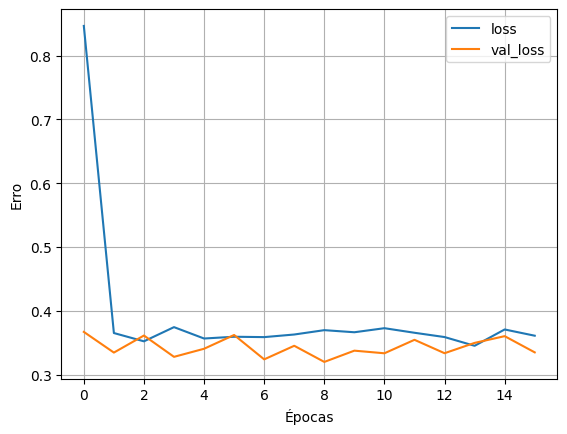

In [ ]:
# Fazendo previsões
history = linear_regression.fit(X_train, y_train, epochs=16, validation_data=(X_test, y_test))
plot_loss(history)

In [ ]:
# Avaliando o modelo
y_pred = linear_regression.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))

r2_lr = r2_score(y_test, y_pred)
print("R2:", r2_lr)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MSE:  0.2739696409540302
R2: 0.6548599395398098


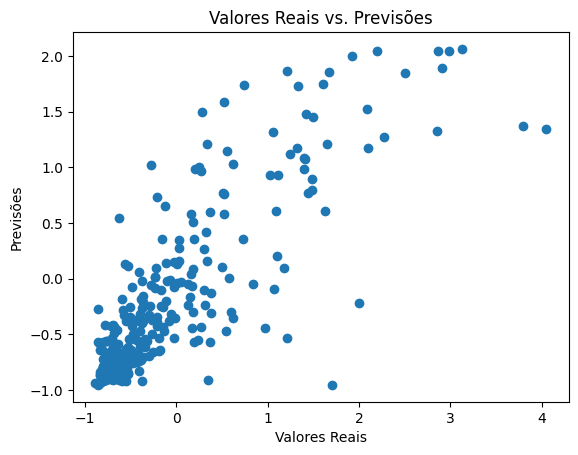

In [ ]:
# Visualizando os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()

# Redes Neurais

In [ ]:
normalizer = tf.keras.layers.Normalization(input_shape=(X_train.shape[1],))
normalizer.adapt(X_train)

In [ ]:
neural_network = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

neural_network.summary()

neural_network.compile(optimizer='adam',
              loss='mean_absolute_error')

history = neural_network.fit(
    X_train, y_train,
    epochs=50,
    validation_split = 0.2,
    batch_size=8,
    verbose=0
    )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 7)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218 (876.00 B)

 Trainable params: 203 (812.00 B)

 Non-trainable params: 15 (64.00 B)

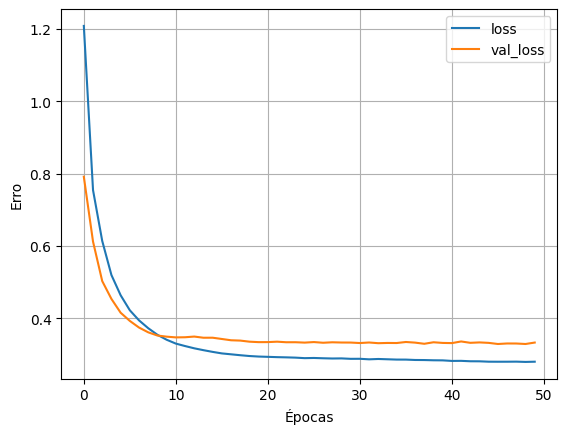

In [ ]:
plot_loss(history)

In [ ]:
# Avaliando o modelo
y_pred = neural_network.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))

r2_nn = r2_score(y_test, y_pred)
print("R2:", r2_nn)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE:  0.2500912785516626
R2: 0.6849412997027278


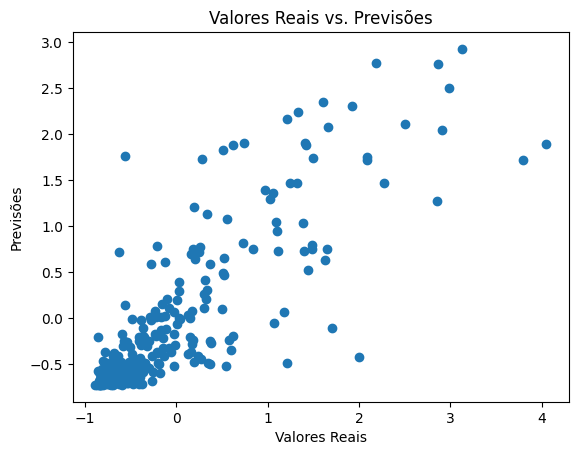

In [ ]:
# Visualizando os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()

# Árvore de Decisões

In [ ]:
decision_tree = DecisionTreeRegressor(random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
# Faz previsões com o conjunto de teste
y_pred = decision_tree.predict(X_test)

# Calculando MSE e R2
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

# Avaliando o modelo
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R2:", r2_dt)

Decision Tree MSE: 0.43204485330408554
Decision Tree R2: 0.4557207642729054


[Text(0.7144084335601577, 0.9821428571428571, 'x[0] <= 7902.5\nsquared_error = 1.086\nsamples = 667\nvalue = 0.026'),
 Text(0.5462976598564775, 0.9464285714285714, 'x[0] <= 3036.5\nsquared_error = 0.239\nsamples = 540\nvalue = -0.357'),
 Text(0.6303530467083176, 0.9642857142857142, 'True  '),
 Text(0.37494755474001984, 0.9107142857142857, 'x[4] <= 600.0\nsquared_error = 0.08\nsamples = 401\nvalue = -0.55'),
 Text(0.3735506628245318, 0.875, 'x[0] <= 2216.5\nsquared_error = 0.063\nsamples = 400\nvalue = -0.556'),
 Text(0.201238526626888, 0.8392857142857143, 'x[0] <= 451.5\nsquared_error = 0.052\nsamples = 337\nvalue = -0.599'),
 Text(0.03588811768814388, 0.8035714285714286, 'x[2] <= 1.0\nsquared_error = 0.036\nsamples = 80\nvalue = -0.708'),
 Text(0.005587567661952156, 0.7678571428571429, 'x[4] <= 5.5\nsquared_error = 0.343\nsamples = 4\nvalue = -0.441'),
 Text(0.002793783830976078, 0.7321428571428571, 'x[0] <= 101.0\nsquared_error = 0.463\nsamples = 2\nvalue = -0.107'),
 Text(0.00139689

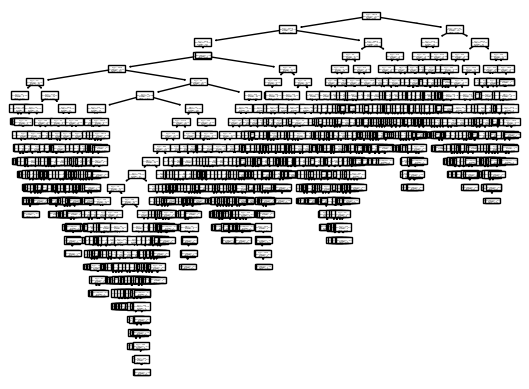

In [ ]:
from sklearn import tree
tree.plot_tree(decision_tree)

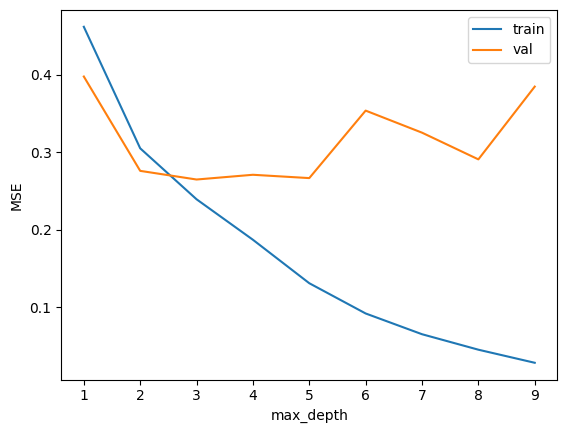

In [ ]:
history_mse_train = []
history_mse_test = []

for max_depth in range(1, 10):
    decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
    decision_tree.fit(X_train, y_train)
    history_mse_train.append(mean_squared_error(y_train, decision_tree.predict(X_train)))
    history_mse_test.append(mean_squared_error(y_test, decision_tree.predict(X_test)))

# Avaliação
plt.plot(range(1, 10), history_mse_train, label='train')
plt.plot(range(1, 10), history_mse_test, label='val')
plt.ylabel('MSE')
plt.xlabel('max_depth')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Verificando o overfitting com validação cruzada
scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE para Árvore de Decisão:", -scores.mean())
print("Treinamento MSE para Árvore de Decisão:", mse_dt)

Cross-Validation MSE para Árvore de Decisão: 0.429305537503037
Treinamento MSE para Árvore de Decisão: 0.43204485330408554


# Comparação dos modelos

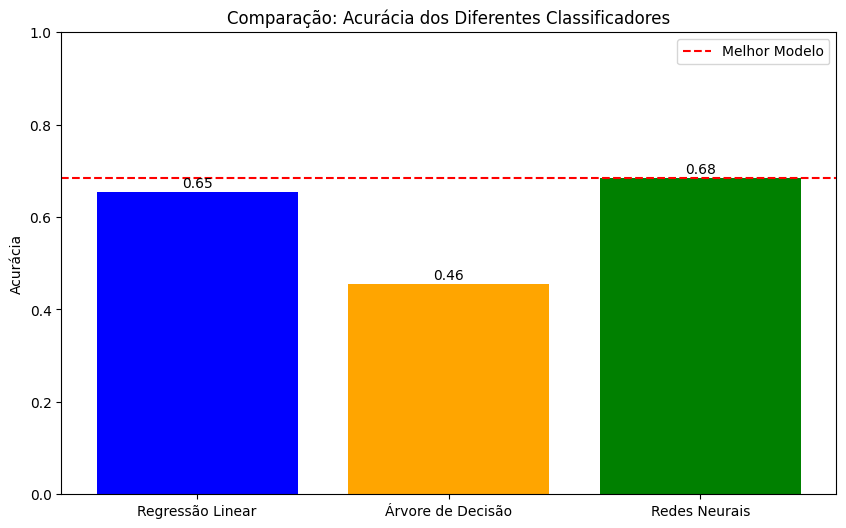

In [ ]:
accuracies = [r2_lr,r2_dt, r2_nn]
models = ['Regressão Linear','Árvore de Decisão', 'Redes Neurais']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação: Acurácia dos Diferentes Classificadores')
plt.axhline(y=max(accuracies), color='red', linestyle='--', label='Melhor Modelo')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.legend()
plt.show()